# Exercise: RDataFrame basics

The file `../data/example_file.root` contains a `TTree` dataset (called `"dataset"`) with two scalar columns `a` and `b`.<br>
There is a normal distribution hidden in there, but to display it you have to plot the natural logarithm of `a` only for entries in which `b <= 0.5`.

### Useful links

- [RDataFrame class reference](https://root.cern/doc/master/classROOT_1_1RDataFrame.html)
- [RDataFrame tutorials](https://root.cern.ch/doc/master/group__tutorial__dataframe.html)

In [2]:
import ROOT

Welcome to JupyROOT 6.30/07


In [3]:
treename = "dataset"
filename = "example_file.root"
df = ROOT.RDataFrame(treename, filename)

In [4]:
df.GetColumnNames()

vector<string>{ "a", "b", "vec1", "vec2" }

In [5]:
df1 = df.Filter("b <= 0.5")
df2 = df1.Define("c", "TMath::Log(a)")

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      53.0764
NDf                       =           67
Edm                       =  7.74747e-08
NCalls                    =           59
Constant                  =      31.1575   +/-   1.31513     
Mean                      =   -0.0793623   +/-   0.0330626   
Sigma                     =      0.97143   +/-   0.0278571    	 (limited)


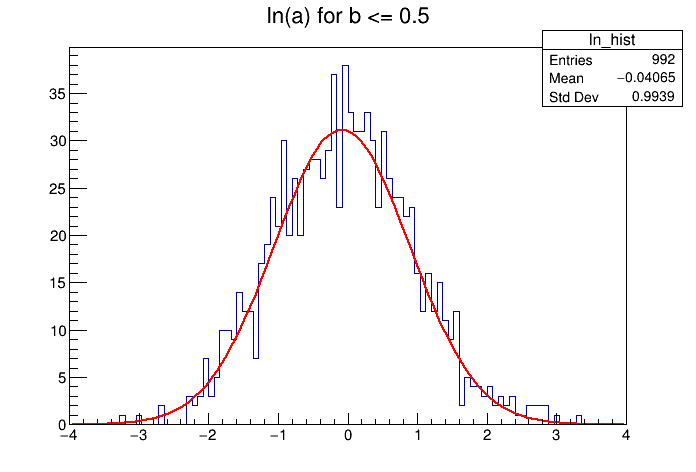

In [6]:
h = df2.Histo1D(("ln_hist", "ln(a) for b <= 0.5", 100, -4, 4), "c")
c = ROOT.TCanvas("ln_hist","c")
gaus = ROOT.TF1("gaus", "gaus", -4, 4)
h.Fit(gaus)
h.Draw()
c.Draw()